In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)

In [4]:
print(x)
print()
print(y)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

tensor([[0.0454],
        [2.1076],
        [4.2211],
        [6.2455],
        [8.5258]])


In [5]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        y = self.fc(x)
    
        return y

In [6]:
model = LinearRegressor()
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
loss_stack = []
for epoch in range(1001):
    
    optimizer.zero_grad()
    
    y_hat = model(x)
    loss = criterion(y_hat, y)
    
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: {loss.item()}')

Epoch 0: 38.39784622192383
Epoch 100: 2.634148359298706
Epoch 200: 0.2222948968410492
Epoch 300: 0.055271971970796585
Epoch 400: 0.03983466699719429
Epoch 500: 0.03506999835371971
Epoch 600: 0.03144290670752525
Epoch 700: 0.028264472261071205
Epoch 800: 0.025446543470025063
Epoch 900: 0.022945968434214592
Epoch 1000: 0.02072681486606598


In [9]:
with torch.no_grad():
    y_hat = model(x)

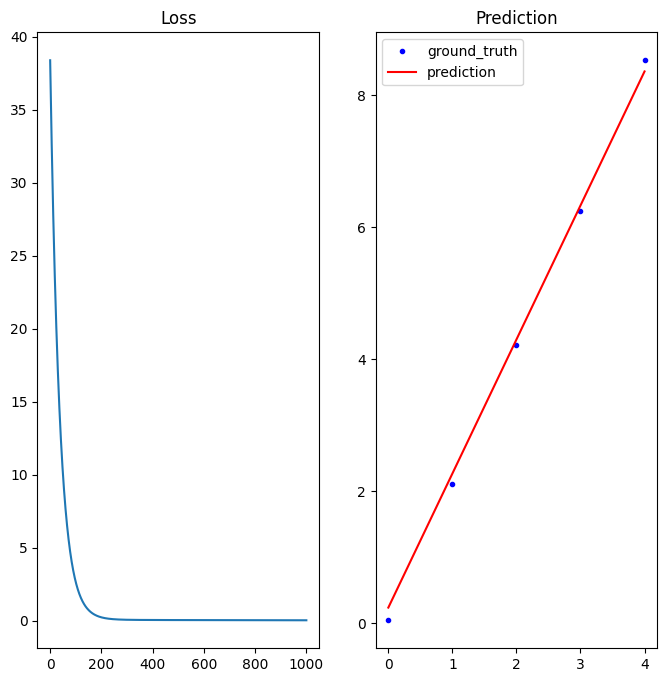

In [10]:
plt.figure(figsize=(8,8))

plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground_truth', 'prediction'])
plt.title('Prediction')
plt.show()